# Find the causes of the happiness

## Import

In [1]:
import numpy as np
import pandas as pd
import zipfile
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap

## Read Dataset

In [3]:
zf = zipfile.ZipFile('../Datasets/happiness.zip')
text_files = zf.infolist()
l = []

print ("Uncompressing and reading data... ")

for text_file in text_files:
    print(text_file.filename)
    df = pd.read_csv(zf.open(text_file.filename))
    l.append(df)

df = pd.concat(l)

Uncompressing and reading data... 
2019.csv


## Dataset exploration

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [91]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


### Correlation between KPIs

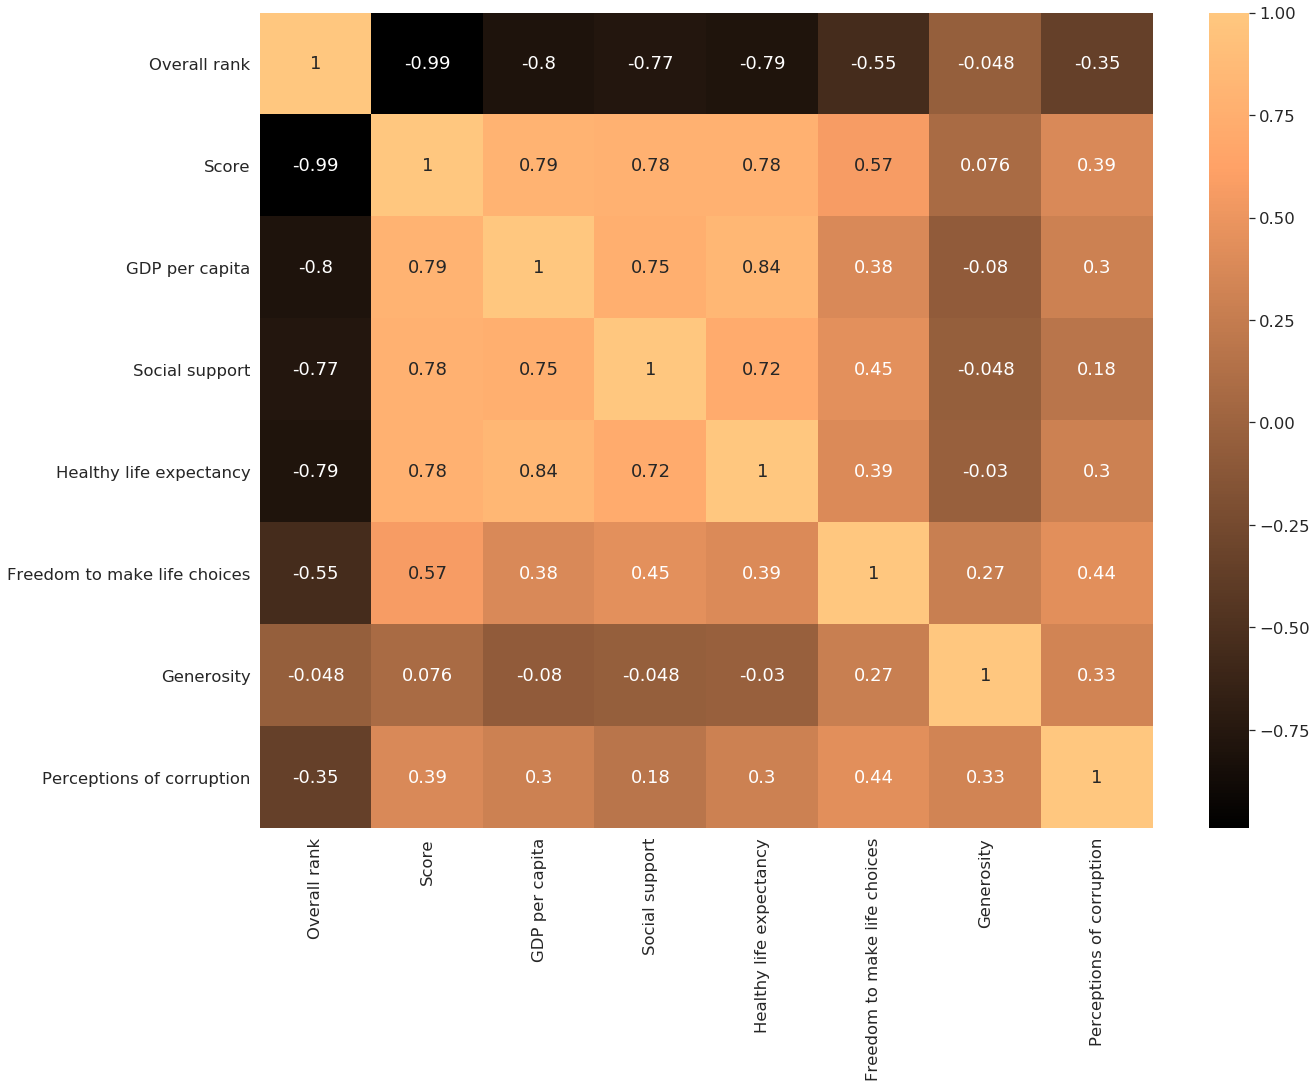

In [92]:
plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(df.corr(), cmap = 'copper', annot = True)
plt.show()

<Figure size 1440x1440 with 0 Axes>

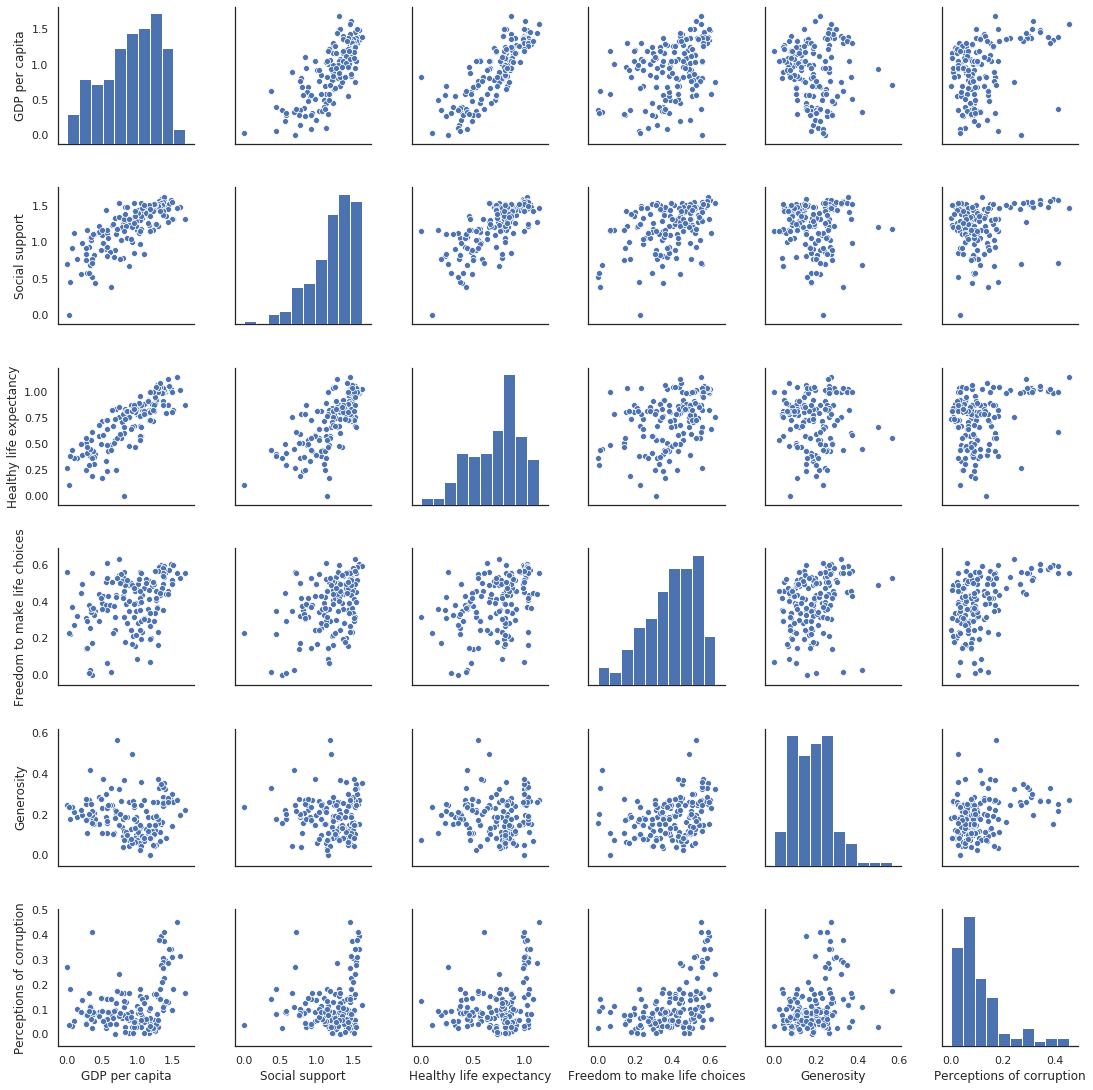

In [93]:
fig = plt.figure(figsize=(20,20))
sns.set(style="white",font_scale=1);
sns.pairplot(df.drop(columns=["Overall rank", "Score"]));

### GeoMap

In [94]:
concap = pd.read_csv("/home/samuelesormano/Documents/Beginner-Data-Science-Projects/Datasets/country-capitals.csv")
concap.head()

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,Somaliland,Hargeisa,9.55,44.050000,NaN,Africa
1,South Georgia and South Sandwich Islands,King Edward Point,-54.283333,-36.500000,GS,Antarctica
2,French Southern and Antarctic Lands,Port-aux-Français,-49.35,70.216667,TF,Antarctica
3,Palestine,Jerusalem,31.7666666666667,35.233333,PS,Asia
4,Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe


### World map

In [102]:
data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],df,left_on='CountryName',right_on='Country or region')
print("\n\n 10 most happy country")
data_full[['CountryName','Overall rank']].sort_values('Overall rank').head(10)



 10 most happy country


,CountryName,Overall rank
42,Finland,1
35,Denmark,2
99,Norway,3
54,Iceland,4
94,Netherlands,5
125,Switzerland,6
124,Sweden,7
95,New Zealand,8
24,Canada,9
6,Austria,10


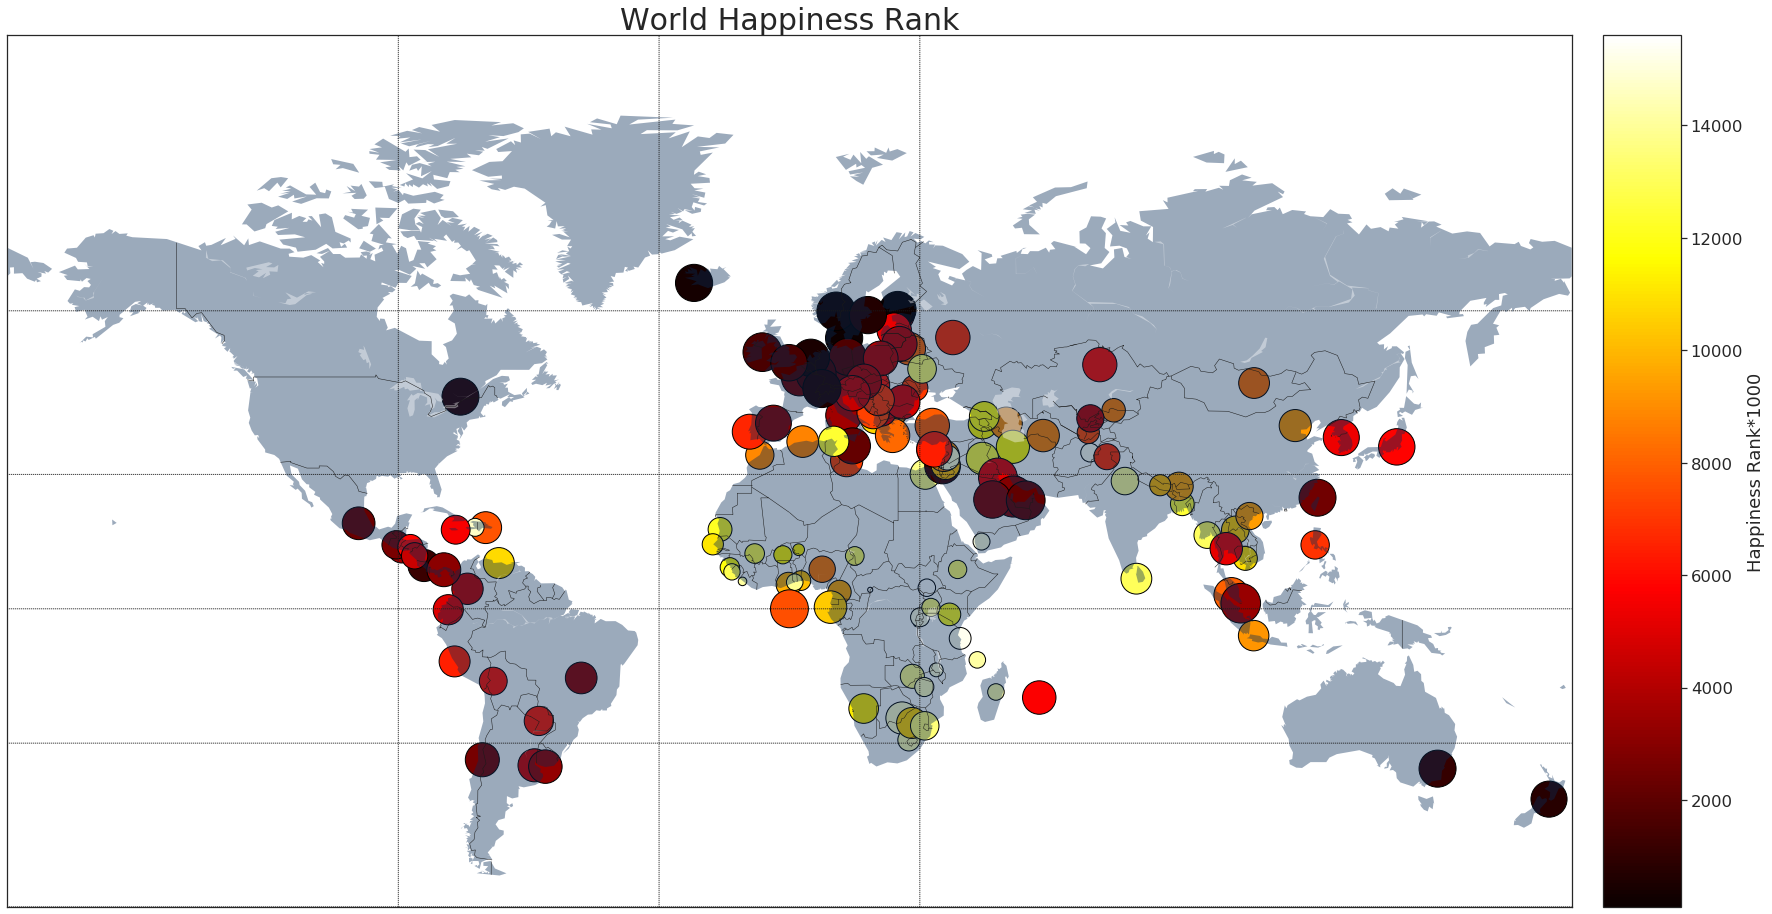

In [86]:
def mapWorld(data, basemap, column_color, column_size, title):
    #m.drawcoastlines()
    basemap.drawcountries()
    basemap.drawparallels(np.arange(-90,91.,30.))
    basemap.drawmeridians(np.arange(-90,90.,60.))
    
    #m.drawmapboundary(fill_color='#FFFFFF')
    lat = data['CapitalLatitude'].values
    lon = data['CapitalLongitude'].values
    a_1 = data[column_color].values
    a_2 = data[column_size].values
    basemap.scatter(lon, lat, latlon=True,c=100*a_1,s=1000*a_2,linewidth=1,edgecolors='black',cmap='hot', alpha=1)
    
    basemap.fillcontinents(color='#072B57',lake_color='#FFFFFF',alpha=0.4)
    cbar = basemap.colorbar()
    cbar.set_label('Happiness Rank*1000')
    #plt.clim(20000, 100000)
    plt.title(title, fontsize=30)
    plt.show()
sns.set(style="white",font_scale=1.5)
plt.figure(figsize=(30,30))
m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution='c')
mapWorld(data_full, m, "Overall rank", "GDP per capita", "World Happiness Rank")

### Europe map

In [106]:
contr_list = list(concap[concap['ContinentName'].isin(['Europe'])]['CountryName'].unique())
eu_gps = concap[concap['CountryName'].isin(contr_list)]
eu_full = pd.merge(eu_gps[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         df,left_on='CountryName',right_on='Country or region')

print("\n\n 10 most happy european country")
eu_full[['CountryName','Overall rank']].sort_values('Overall rank').head(10)



 10 most happy european country


,CountryName,Overall rank
13,Finland,1
11,Denmark,2
30,Norway,3
19,Iceland,4
29,Netherlands,5
40,Switzerland,6
39,Sweden,7
2,Austria,10
25,Luxembourg,14
43,United Kingdom,15


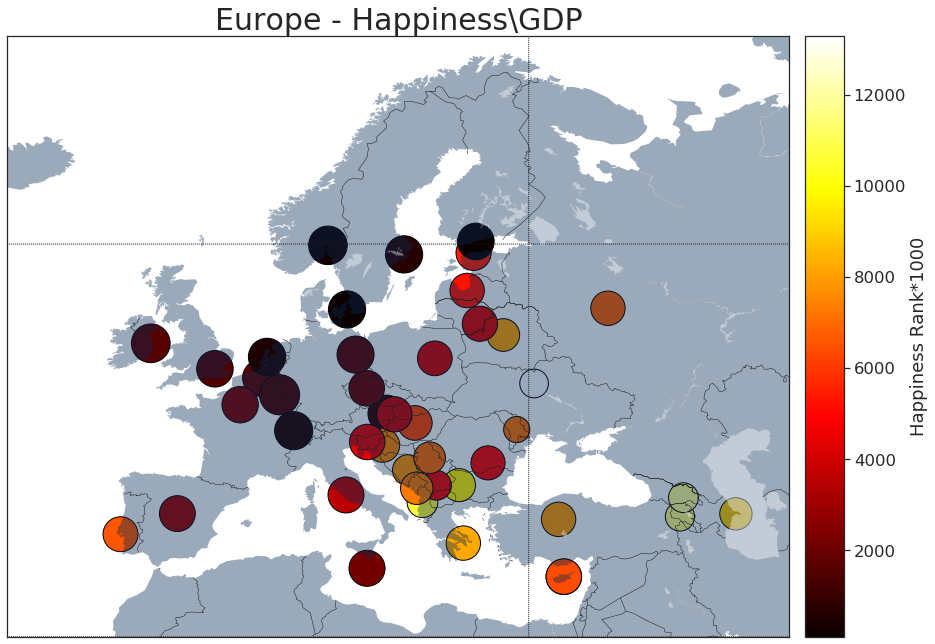

In [104]:
m = Basemap(projection='mill',llcrnrlat=30,urcrnrlat=72,llcrnrlon=-20,urcrnrlon=55,resolution='l')    
sns.set(style="white",font_scale=1.5)
plt.figure(figsize=(15,15))
mapWorld(eu_full, m, 'Overall rank', 'GDP per capita', "Europe - Happiness\GDP")